In [26]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.feature import hog
from sklearn.decomposition import PCA


In [1]:
pip install kaggle


In [3]:
!kaggle datasets download -d hendrichscullen/vehide-dataset-automatic-vehicle-damage-detection
!unzip vehide-dataset-automatic-vehicle-damage-detection.zip


Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 10, in <module>
    sys.exit(main())
             ^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/kaggle/cli.py", line 68, in main
    out = args.func(**command_args)
          ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/kaggle/api/kaggle_api_extended.py", line 1741, in dataset_download_cli
    with self.build_kaggle_client() as kaggle:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/kaggle/api/kaggle_api_extended.py", line 688, in build_kaggle_client
    username=self.config_values['username'],
             ~~~~~~~~~~~~~~~~~~^^^^^^^^^^^^
KeyError: 'username'
unzip:  cannot find or open vehide-dataset-automatic-vehicle-damage-detection.zip, vehide-dataset-automatic-vehicle-damage-detection.zip.zip or vehide-dataset-automatic-vehicle-damage-detection.zip.ZIP.


In [4]:
from google.colab import files
files.upload()


Saving kaggle.json to kaggle (1).json


{'kaggle (1).json': b'{"username":"hellisrightinmyeyes","key":"d5dbcd9dc95b54a8b4c1a3054699735b"}'}

In [5]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [6]:
!kaggle datasets download -d hendrichscullen/vehide-dataset-automatic-vehicle-damage-detection


Dataset URL: https://www.kaggle.com/datasets/hendrichscullen/vehide-dataset-automatic-vehicle-damage-detection
License(s): apache-2.0
 97% 2.04G/2.10G [00:26<00:01, 43.5MB/s]
100% 2.10G/2.10G [00:26<00:00, 84.8MB/s]


In [7]:
!unzip vehide-dataset-automatic-vehicle-damage-detection.zip


Streaming output truncated to the last 5000 lines.
  inflating: image/image/22102020_091634image60207.jpg  
  inflating: image/image/22102020_091653image57537.jpg  
  inflating: image/image/22102020_091656image985485.jpg  
  inflating: image/image/22102020_092538image234088.jpg  
  inflating: image/image/22102020_092538image907615.jpg  
  inflating: image/image/22102020_092550image230529.jpg  
  inflating: image/image/22102020_095630image160624.jpg  
  inflating: image/image/22102020_095647image656381.jpg  
  inflating: image/image/22102020_095647image820454.jpg  
  inflating: image/image/22102020_095712image495296.jpg  
  inflating: image/image/22102020_095717image839663.jpg  
  inflating: image/image/22102020_095816image850173.jpg  
  inflating: image/image/22102020_100140image618831.jpg  
  inflating: image/image/22102020_102401image261580.jpg  
  inflating: image/image/22102020_102410image986649.jpg  
  inflating: image/image/22102020_102413image593513.jpg  
  inflating: image/imag

In [10]:
import os
os.listdir()


['.config',
 '0Val_via_annos.json',
 'kaggle (1).json',
 'image',
 '0Train_via_annos.json',
 'vehide-dataset-automatic-vehicle-damage-detection.zip',
 'validation',
 'sample_data']

In [12]:
import os
os.listdir("image")


['image']

In [13]:
IMG_DIR = "image/image"


In [29]:
IMG_DIR = "image/image"
IMG_SIZE = 128

images = []

for file in os.listdir(IMG_DIR):
    if file.lower().endswith(('.jpg', '.png', '.jpeg')):
        img_path = os.path.join(IMG_DIR, file)
        img = cv2.imread(img_path)

        if img is None:
            continue

        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  # grayscale
        img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
        images.append(img)

        if len(images) == 600:   # load a few images only
            break

images = np.array(images)
print("Loaded images:", images.shape)


Loaded images: (600, 128, 128)


In [30]:
hog_features = []
hog_images = []

for img in images:
    features, hog_image = hog(
        img,
        orientations=9,
        pixels_per_cell=(8, 8),
        cells_per_block=(2, 2),
        visualize=True,
        block_norm='L2-Hys'
    )
    hog_features.append(features)
    hog_images.append(hog_image)

hog_features = np.array(hog_features)
print("HOG feature shape:", hog_features.shape)


HOG feature shape: (600, 8100)


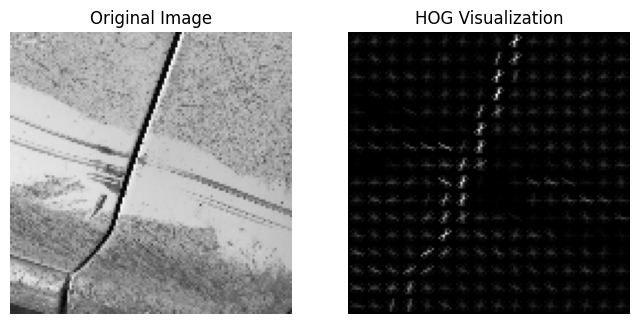

In [31]:
plt.figure(figsize=(8,4))

plt.subplot(1,2,1)
plt.imshow(images[0], cmap='gray')
plt.title("Original Image")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(hog_images[0], cmap='gray')
plt.title("HOG Visualization")
plt.axis("off")

plt.show()


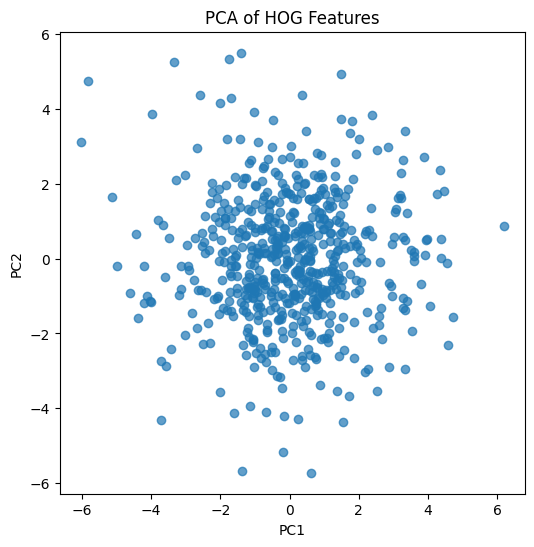

In [32]:
pca = PCA(n_components=2)
hog_pca = pca.fit_transform(hog_features)

plt.figure(figsize=(6,6))
plt.scatter(hog_pca[:,0], hog_pca[:,1], alpha=0.7)
plt.title("PCA of HOG Features")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()


What visual information does HOG preserve?



HOG preserves local edge directions and gradient orientation patterns, capturing object shape and contour information while ignoring color and fine texture details.

Why might HOG struggle with complex damage patterns?



Vehicle damage often involves irregular textures, subtle dents, and lighting variations. Since HOG relies on fixed, hand-crafted gradient features, it cannot adapt to such complex patterns, making it less effective than learned CNN features.